<a href="https://colab.research.google.com/github/daemonX10/Data-Science/blob/main/6.0%20Deep%20Learning/Youtube/CNN/colab/data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os


In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 1s 0us/step


In [6]:
data_dir


'./datasets/flower_photos'

In [7]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [9]:
# import pathlib
# data_dir = pathlib.Path('.')

In [18]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/17062080069_36ac7907d2_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14408977935_a397e796b8_m.jpg'),
 PosixPath('datasets/flower_photos/roses/9216321995_83df405ea9.jpg'),
 PosixPath('datasets/flower_photos/roses/9337528427_3d09b7012b.jpg'),
 PosixPath('datasets/flower_photos/roses/15602874619_03fd934bed.jpg')]

In [19]:
image_count = len(list(data_dir.glob('*/*.jpg')))

In [20]:
image_count

3670

In [21]:
roses = list(data_dir.glob('roses/*'))
roses[:4]

[PosixPath('datasets/flower_photos/roses/17062080069_36ac7907d2_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14408977935_a397e796b8_m.jpg'),
 PosixPath('datasets/flower_photos/roses/9216321995_83df405ea9.jpg'),
 PosixPath('datasets/flower_photos/roses/9337528427_3d09b7012b.jpg')]

In [22]:
from PIL import Image

In [ ]:
str(roses[3])

'flower_photos\\roses\\10894627425_ec76bbc757_n.jpg'

In [ ]:
# for i in range(1,6):
#     img = Image.open(str(roses[i]))
#     img.show()

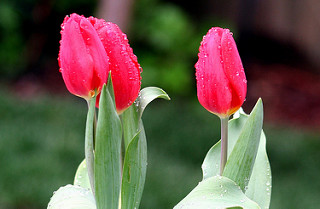

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[0]))

In [9]:
flowers_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*'))
}

In [10]:
flowers_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

In [ ]:
flowers_images_dict['roses'][:5]

[WindowsPath('flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [ ]:
str(flowers_images_dict['roses'][0])

'flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [25]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [26]:
img.shape

(238, 320, 3)

In [28]:
# flowers_images_dict

In [29]:
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [ ]:
flowers_labels_dict

{'roses': 0, 'daisy': 1, 'dandelion': 2, 'sunflowers': 3, 'tulips': 4}

In [11]:
x , y = [], []
for flower_name , images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180, 180))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [12]:
X = np.array(x)
y = np.array(y)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [14]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [15]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16,kernel_size=(3,3),padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [16]:
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


86/86 [==============================] - 8s 20ms/step - loss: 1.2514 - accuracy: 0.4815
Epoch 2/30
86/86 [==============================] - 2s 20ms/step - loss: 0.9728 - accuracy: 0.6195
Epoch 3/30
86/86 [==============================] - 2s 22ms/step - loss: 0.8102 - accuracy: 0.6926
Epoch 4/30
86/86 [==============================] - 2s 21ms/step - loss: 0.5801 - accuracy: 0.7845
Epoch 5/30
86/86 [==============================] - 2s 20ms/step - loss: 0.3838 - accuracy: 0.8656
Epoch 6/30
86/86 [==============================] - 2s 21ms/step - loss: 0.2363 - accuracy: 0.9190
Epoch 7/30
86/86 [==============================] - 2s 22ms/step - loss: 0.1451 - accuracy: 0.9513
Epoch 8/30
86/86 [==============================] - 2s 20ms/step - loss: 0.0950 - accuracy: 0.9717
Epoch 9/30
86/86 [==============================] - 2s 20ms/step - loss: 0.0442 - accuracy: 0.9866
Epoch 10/30
86/86 [==============================] - 2s 21ms/step - loss: 0.0218 - accuracy: 0.9949
Epoch 11/30
86/86 [=

In [17]:
model.evaluate(X_test_scaled, y_test)

 6/29 [=====>........................] - ETA: 0s - loss: 3.4021 - accuracy: 0.6302

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


29/29 [==============================] - 1s 21ms/step - loss: 3.5077 - accuracy: 0.6394


[3.507657289505005, 0.6394335627555847]

In [18]:
predication = model.predict(X_test_scaled)

29/29 [==============================] - 0s 10ms/step


In [19]:
score = tf.nn.softmax(predication[0])

In [22]:
np.argmax(score)

4

In [23]:
y_test[0]

1

In [30]:
X[0]
img_height = 180
img_width = 180

In [31]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape = (img_height,img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

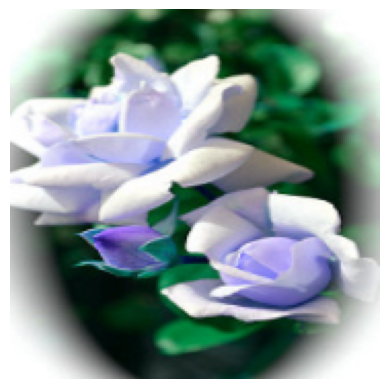

In [35]:
plt.axis('off')
plt.imshow(X[0])

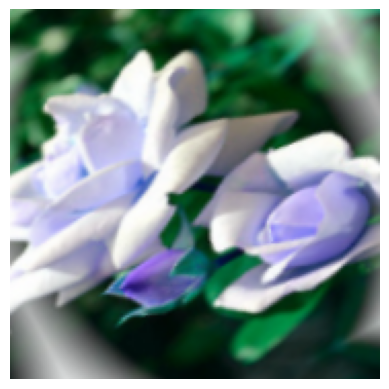

In [36]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [40]:
model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(X_train_scaled, y_train, epochs=30, validation_data=(X_test_scaled, y_test))

Epoch 1/30
86/86 [==============================] - 7s 48ms/step - loss: 1.4349 - accuracy: 0.3775 - val_loss: 1.1838 - val_accuracy: 0.5076
Epoch 2/30
86/86 [==============================] - 3s 31ms/step - loss: 1.0482 - accuracy: 0.5901 - val_loss: 1.0435 - val_accuracy: 0.5817
Epoch 3/30
86/86 [==============================] - 3s 31ms/step - loss: 0.9593 - accuracy: 0.6148 - val_loss: 0.9886 - val_accuracy: 0.6275
Epoch 4/30
86/86 [==============================] - 3s 31ms/step - loss: 0.8515 - accuracy: 0.6686 - val_loss: 0.9561 - val_accuracy: 0.6329
Epoch 5/30
86/86 [==============================] - 3s 38ms/step - loss: 0.8350 - accuracy: 0.6781 - val_loss: 0.9682 - val_accuracy: 0.6394
Epoch 6/30
86/86 [==============================] - 3s 31ms/step - loss: 0.7892 - accuracy: 0.6915 - val_loss: 0.8594 - val_accuracy: 0.6776
Epoch 7/30
86/86 [==============================] - 3s 31ms/step - loss: 0.7419 - accuracy: 0.7257 - val_loss: 0.9113 - val_accuracy: 0.6427
Epoch 8/30
86